In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('datasets/african_econ_crises.csv')

In [5]:
df.head()

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis


In [6]:
df.shape

(1059, 14)

In [16]:
dfc = df.copy()

In [18]:
dfc = dfc.drop(['case', 'cc3', 'country', 'year'], axis=1)

In [22]:
X = dfc.iloc[:, :-1].values

In [23]:
y = dfc.iloc[:, -1].values

In [39]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(y)
y

array([0, 1, 1, ..., 1, 1, 1])

In [40]:
# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
# Scale data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [42]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(13, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [53]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min')

In [54]:
model.fit(X_train, y_train, batch_size=10, epochs=100, callbacks=[early_stop], validation_data=(X_test, y_test))

Train on 847 samples, validate on 212 samples
Epoch 1/100
847/847 [==============================] - 1s 996us/sample - loss: 0.6084 - accuracy: 0.8158 - val_loss: 0.5276 - val_accuracy: 0.9198
Epoch 2/100
847/847 [==============================] - 0s 294us/sample - loss: 0.5045 - accuracy: 0.8831 - val_loss: 0.4083 - val_accuracy: 0.9198
Epoch 3/100
847/847 [==============================] - 0s 320us/sample - loss: 0.4396 - accuracy: 0.9126 - val_loss: 0.3281 - val_accuracy: 0.9151
Epoch 4/100
847/847 [==============================] - 0s 287us/sample - loss: 0.3868 - accuracy: 0.9079 - val_loss: 0.2802 - val_accuracy: 0.9151
Epoch 5/100
847/847 [==============================] - 0s 309us/sample - loss: 0.3480 - accuracy: 0.9126 - val_loss: 0.2438 - val_accuracy: 0.9151
Epoch 6/100
847/847 [==============================] - 0s 302us/sample - loss: 0.3303 - accuracy: 0.9103 - val_loss: 0.2163 - val_accuracy: 0.9198
Epoch 7/100
847/847 [==============================] - 0s 303us/sample -

In [55]:
metrics = pd.DataFrame(model.history.history)

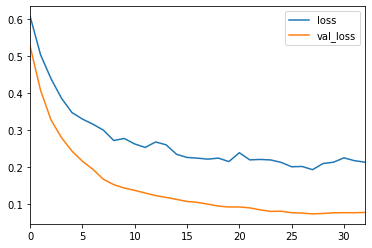

In [56]:
metrics[['loss', 'val_loss']].plot()

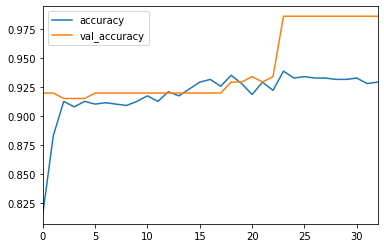

In [57]:
metrics[['accuracy', 'val_accuracy']].plot()

In [58]:
pred = model.predict_classes(X_test)

In [59]:
model.evaluate(X_test, y_test,verbose=0)

[0.07763054889609229, 0.9858491]

In [60]:
from sklearn.metrics import confusion_matrix, classification_report

In [61]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91        18
           1       0.99      0.99      0.99       194

    accuracy                           0.99       212
   macro avg       0.97      0.94      0.95       212
weighted avg       0.99      0.99      0.99       212



In [62]:
print(confusion_matrix(y_test, pred))

[[ 16   2]
 [  1 193]]


In [64]:
model.save('models/african_econ_crises.h5')